In [ ]:
# default_exp intro_to_control_theory

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from importing_modules import *

In [ ]:
%matplotlib inline

------------------------

# The Control Problem

This notebook provides an overview of the big picture problem that we’re trying to solve as control system engineers. 

- Control theory allows to solve a number of engineering problems, not only as control engineers but as any engineer
    - Switching power regulators
    - Automatic gain control circuits that automatically increase or decrease the gain of a signal
    - Isolation system in a motor mount that is sensitive to vibrations
    - Industrial robotics
    - etc.

Control system is:
- Building models of your system
- Simulate them to make predictions
- Understanding the dynamics and how they interact with the rest of the system
- Filtering and rejecting noise
- Selecting or designing hardware (sensors, actuators)
- Testing the system in expected and unexpected environments
- It is understanding your system!

------------------

## What is a system?

The concept is straigthforward, but the term is sometime applied very generically

For us:

> A **system** is a collection of interconnected parts that form a larger more complex whole


Engineering problems are usually complex.
- Divide complex projects into smaller parts, or _systems_ makes it possible to simplify the problem and to specialise in specific areas
- Each one of the interconnected parts that form a larger system can be a complex system in its own right!

### Control systems

As a control engineer:
- Goal is to create something that meets the functional or performance requirements you set for the project. 
- The collection of the interconnected parts that are created specifically to meet these requirements are the _control system_ (at least in general)
- More specifically: **A control system is a mechanism that alters the future state of a system**

- For any project however the control system again might be a collection of interconnected parts that require specialists:
    - sensor experts, 
    - actuators experts, 
    - digital signal processing experts, 
    - state estimation experts.

For example:

<tr>
<td> <img src="img/1.Disk-brakes.png" alt="1.Disk-brakes" style="width: 350px;"/> </td>
<td> <img src="img/2.Break-Hydraulics.png" alt="2.Break-Hydraulics" style="width: 350px;"/> </td>
<td> <img src="img/3.Parking-brake-light-system.png" alt="3.Parking-brake-light-system" style="width: 350px;"/> </td>
</tr>

And of course, the breaking system itself is just one of the main interconnected parts that create the car.

### System as a box

- We represent systems graphically as a box
- Arrows going into the box are inputs
- Arrows going out of the box are output

<tr>
<td> <img src="img/4.system.png" alt="4.system" style="width: 350px;"/> </td>
</tr>

- The system inside the box is described through a math model (e.g. equation of motion)
- The "box" can be used to describe systems that are simple or complex

So if we want to start representing it more formally:

<tr>
<td style="text-align: center;"> <img src="img/dyn-system.png" alt="1.Disk-brakes" style="width: 350px;"/> </td>
</tr>

- $u$: control inputs 

- $\xi$: disturbances

- $f$: system (physics is involved here!)

- $\theta$: system parameters (e.g., mass, inertia, spring constants, etc. )


<table style='margin: 0 auto' rules=none>
    <tr>
    <td> <img src="img/5.simple-system.png" alt="5.simple-system" style="width: 300px;"/> </td>
    <td> <img src="img/6.complex-system.png" alt="6.complex-system" style="width: 300px;"/> </td>
    </tr>
</table>

---------------------------

## Three different problems
- Three parts to our simple block diagram
    - The system
    - The inputs (that drive the system)
    - The output (that the system generates)
    
At any given time one of the three parts are unknown, and the part that is unknown defines the problem that you are solving.

### The system identification problem

- As a practicing engineer you won’t always be given a model of your system
- You will need to determine it yourself
- This is done through a process called **System Identification**

<tr>
<td> <img src="img/7.system-identification.png" alt="7.system-identification" style="width: 350px;"/> </td>
</tr>


- What is the mathematical equation that will convert my known inputs into my measured outputs?
- What should I model?

#### Black box vs White box

**Black box**:
- You are given a box that you cannot open, but you are asked to model what is inside
- Subject what is inside the box to various known inputs, measure the output and then infer what is inside the box based on the relationship between the input and the output.

**White box**
- Now you can see exactly what is inside the box (hardware, software).
- You can write the mathematical equations of the dynamics directly (e.g. Netwon's equations of motion).

For example, for a sping-mass system:

<tr>
<td> <img src="img/8.spring-mass-system.jpeg" alt="8.spring-mass-system" style="width: 350px;"/> </td>
<td> $$F = m\ddot{x} + kx$$ </td>
</tr>



- Even the while box method might require to run tests and applying inputs to measure outputs to calculate the parameters of your system.
- E.g., modeling a linear spring: you know the equation but what is the exact spring constant?

Usually, you need to do a bit of both.

------------------------

#### Example: modeling a car

Let's consider an example: car cruise control, using a simplified mathematical model.

<tr>
<td> <img src="img/9.car-uphill.png" alt="9.car-uphill.png" style="width: 350px;"/> </td>
</tr>

$$m\frac{dv}{dt} + \alpha|v|v+\beta v = \gamma u-mgsin(\theta)$$

- Input: gas pedal
- Output: speed (speedometer)
- Disturbance: the slope of the road

Assumptions to simplify the model:
- Thrust is proportional to how much pressure we put on the pedal and this directly translates into how much is open the gas valve
- Frictions and drags are linear with speed
- Small angles: $\theta < 30^o$ so that $sin(\theta) \approx \theta$



Using our assumptions, the previous model can be simplified a little bit as:

$$m\frac{dv}{dt} + \alpha|v|v+\beta v = \gamma u-mgsin(\theta) \approx m\frac{dv}{dt} + \beta v = \gamma u-mg\theta$$

Before we simplify the model though, we can re-write it in a **standard representation** (state space representation):

$$\mathbf{\dot{x}} = [\dot{x_1}, \dot{x_2}]^T$$

\begin{cases}
 \dot{x_1} &= x_2 \\
 \dot{x_2} &= -\frac{\alpha}{m}|x_2|x_2 - \frac{\beta}{m}x_2 + \frac{\gamma}{m}u -gsin(\theta) \\
 y &=x_2
\end{cases}

$$\mathbf{x}(t_0) = x_0$$

- Velocity is the derivative of the position
- Two state variables: position and velocity
- Two inputs: $u$ and $\theta$

- The state $\mathbf{x}$ includes the minimal amount of information at the current time to predict its behaviour in the future, only based on the knowledge of its future inputs.

- In the case we have differential equations from actual physical systems we also need the initial conditions.

- Note that there is no time in the equations above: **time-invariant** system

#### Standard representations

- "standard representations" are the bulding blocks of the engineering language
- Analysis and design are based on having the system in a standard representation 
- Specific problems typically need to be translated into a standard representation
- Control System Software typically assumes that the system is already in a standard representation (and expects inputs based on that)

We can code up our standard representation of the car in Python:

In [ ]:
class Car:
    _g = 9.8 # Gravity
    
    def __init__(self, x0, params):
        self._x_1 = x0[0] # position (along the road)
        self._x_2 = x0[1] # velocity (along the road)
        self._m, self._alpha, self._beta, self._gamma = params
        
    def step(self, dt, u, theta):
        self.theta = theta
        self._x_1 = self._x_1 + dt*self._x_2
        self._x_2 = self._x_2 + dt*(-self._alpha/self._m*abs(self._x_2)*self._x_2 - \
                                    self._beta/self._m*self._x_2 + self._gamma/self._m*u - \
                                    Car._g*np.sin(theta))
        
    def speedometer(self):        
        v = self._x_2
        return (v,)  
    
    # Utility function to simplify plotting
    def sensor_i(self):
        # Rotation matrix to get back to the main frame.
        R = np.array(((np.cos(theta), -np.sin(theta)), (np.sin(theta), np.cos(theta))))
        x_i, y_i = R.dot(np.array([[self._x_1],[0]]))
        v = self._x_2
        return (x_i, y_i, v)

We can linearise the previous model of the car around an equilibrium ($\dot{\mathbf{x}}=0$) as below. 


\begin{equation}
\frac{df}{dx}=
\begin{bmatrix}
0 & 1\\
0 & -\frac{\alpha}{m}|x_2|-\frac{\beta}{m}
\end{bmatrix}
\end{equation}

\begin{equation}
\frac{df}{du}=
\begin{bmatrix}
0 & 0\\
\frac{\gamma}{m} & -gcos(\theta)
\end{bmatrix}
\end{equation}

which, at the equilibrium $x_1=0, x_2=0$ (note that $x_1$ really does not affect the result):


\begin{equation}
A=\frac{df}{dx}=
\begin{bmatrix}
0 & 1\\
0 & -\frac{\beta}{m}
\end{bmatrix}
\end{equation}

\begin{equation}
B=\frac{df}{du}=
\begin{bmatrix}
0 & 0\\
\frac{\gamma}{m} & -g
\end{bmatrix}
\end{equation}

and

$$\dot{\mathbf{x}}=A\mathbf{x}+B\mathbf{u}$$
$$y=[0 \; 1]\mathbf{x}$$


In [ ]:
class LinearCar:
    _g = 9.8
    
    def __init__(self, x0, params):
        self._x_1 = x0[0] # position (along the road)
        self._x_2 = x0[1] # velocity
        self._m, self._alpha, self._beta, self._gamma = params
        
    def step(self, dt, u, theta):
        self._theta = theta
        A = np.array([[0, 1], [0, -self._beta/self._m]])
        B = np.array([[0, 0], [self._gamma/self._m, -LinearCar._g]])
        
        x = np.array([[self._x_1],[self._x_2]])
        U = np.array([[u],[theta]])
        self._x_1 = (self._x_1 + dt*(A[0,np.newaxis,:].dot(x) + B[0,np.newaxis,:].dot(U))).item()
        self._x_2 = (self._x_2 + dt*(A[1,np.newaxis,:].dot(x) + B[1,np.newaxis,:].dot(U))).item()
        
    def speedometer(self):        
        v = self._x_2
        return (v,)
    
    def sensor_i(self):
        # Rotation matrix to get back to the inertial frame..
        R = np.array(((np.cos(self._theta), -np.sin(self._theta)), 
                      (np.sin(self._theta), np.cos(self._theta))))
        x_i, y_i = R.dot(np.array([[self._x_1],[0]]))
        v = self._x_2
        return (x_i, y_i, v)

#### Comments
- Multiple models can be used to represent a physical system
- There are a number of parameters in our models ($m$, $\alpha$, $\beta$, $\gamma$)
- Their value depend on the specific car you are modeling
- It might not be easy to have good values for these parameters

## The simulation problem

- Predict how your outputs change given a known set of inputs and the mathematical model of the system
- Usually a lot of design time is spent in this stage
- It can be difficult to figure out the set of inputs and their range to characterise the operational envelope of the system


<tr>
<td> <img src="img/10.the-simulation-problem.png" alt="10.the-simulation-problem.png" style="width: 350px;"/> </td>
</tr>



You need to run a simulation to answer:
- Does my system model match my test data?
- Will my system work in all operating environments?
- What happens when...
- Simulations can also be used to limit the number of field tests (which are usually expensive or might let you avoid dangerous maneouvers)

If we go back to our Python car, we can now easily simulate it:

In [ ]:
# We assume we have identified the model parameters
m = 10
alpha = 1
beta = 1
gamma = 1
params = (m, alpha, beta, gamma)

# We select the car initial conditions (position and velocity)
x_0 = (0,0)

# We create our car
car = Car(x_0, params)

In [ ]:
# We define out inputs:
theta = np.radians(20) # disturbance
u = 0                  # Input

# And finally we define the simulation parameters
t0, tf, dt = 0, 10, 0.1 # time

position = []
velocity = []
time = []
for t in np.arange(t0, tf, dt):
    car.step(dt, u, theta)
    x, y, v = car.sensor_i()
    position.append((x,y)), velocity.append(v)
    time.append(t)
    
print('simulation complete')    

simulation complete


Done! Now we can see what happened..

Let's plot the results:

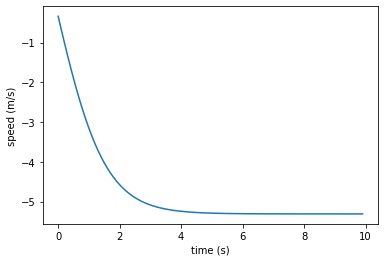

In [ ]:
fig, ax = plt.subplots();

plt.plot(time, velocity)
plt.xlabel('time (s)')
plt.ylabel('speed (m/s)');

What happens if we simulate our LinearCar?

In [ ]:
# We select the car initial conditions (position and velocity)
x_0 = (0,0)

# We create our car
car = LinearCar(x_0, params)

# We define out inputs:
theta = np.radians(20) # disturbance
u = 0                  # Input

# And finally we define the simulation parameters
t0, tf, dt = 0, 10, 0.1 # time

lin_position = []
lin_velocity = []
time = []
for t in np.arange(t0, tf, dt):
    car.step(dt, u, theta)
    x, y, v = car.sensor_i()
    lin_position.append((x,y)), lin_velocity.append(v)
    time.append(t)
    
print('simulation complete')    

simulation complete


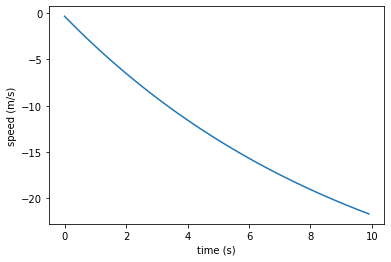

In [ ]:
fig, ax = plt.subplots();

plt.plot(time, lin_velocity)
plt.xlabel('time (s)')
plt.ylabel('speed (m/s)');

- Multiple models can be used to represent a physical system and the complexity of the model depends on the objectives

### More complex representation

We can have much more complex representation of our simulation:

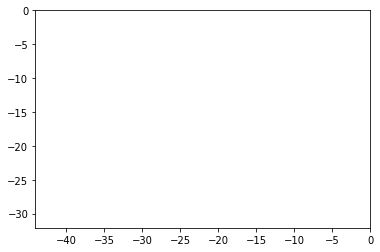

In [ ]:
# First set up the figure, the axis, and the plot elements we want to animate
fig, ax = plt.subplots();

ax.set_xlim((min(position)[0], max(position)[0]))
ax.set_ylim((min(position)[1]*2, max(position)[1]))
line, = ax.plot([], [], lw=4);

In [ ]:
# draw terrain
def terrain(theta_rad, x_0, x_range):
    y_range = theta*(x_range-x_0[0])+x_0[1]-10
    close_triangle = (x_range[0], y_range[-1])
    x_range = np.append(x_range, close_triangle[0])
    y_range = np.append(y_range, close_triangle[1])
    X = np.matrix([x_range, y_range]).transpose()
    patch = plt.Polygon(X, color='yellow')
    return patch

x_range = np.linspace(int(position[0][0]), int(position[-1][0]), num=20)
patch = terrain(theta_rad=theta, x_0=x_0, x_range=x_range)

# initialization function: plot the background of each frame
def init():
    ax.add_patch(patch)
    return patch,

# animation function. This is called sequentially
def animate(i):    
    #line.set_data(time[max(0,i-2):i], position[max(0,i-2):i])
    x_min, x_max = position[max(0,i-2)][0], position[i][0]
    y_min, y_max = position[max(0,i-2)][1], position[i][1]
    line.set_data([x_min, x_max], [y_min, y_max])
    return (line,)


# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(time), interval=40, blit=True,
                               repeat_delay=10000, repeat=True);

HTML(anim.to_html5_video())
#anim

----------------------------

## The Control Problem

- We know the model of the system 
- We know how we want the system outputs to behave 
- We can determine the appropriate inputs through various control methods.

_Control problem - how do we generate the appropriate system input that will produce the desired output?_

- Control theory gives you the tools needed to answer this question. 
- Without control theory, the designer is relegated to choosing a control system through trial and error.

- How can I get my system to meet my performance requirements?
- How can I automate a process that currently involves humans in the
loop?
- How can my system operate in a dynamic and noisy environment?

<tr>
<td> <img src="img/11.The-control-problem.png" alt="11.The-control-problem" style="width: 350px;"/> </td>
</tr>

---------------------------

# Why do we need feedback control?

### Open-loop control

<table style='margin: 0 auto' rules=none>
<tr>
<td style="text-align: center;"> <img src="img/dyn-system.png" alt="1.Disk-brakes" style="width: 350px;"/> </td>
</tr>
</table>

- Now the box isn’t just any system, it’s specifically a system that we want to control. 
- We call the system that is being controlled as the **process** (or controlled system). 
- The **inputs** into the process are variables that we have access to and can change based on whichever control scheme we choose (manipulated variables).
- Actuators manipulate these variables. An actuator is a generic term that refers to a device or motor that is responsible for controlling a system.
- The actuators are driven by an actuating signal that is generated by the controller.

<tr>
<td> <img src="img/12.feedback-control-1.png" alt="12.feedback-control-1" style="width: 550px;"/> </td>
</tr>

This type of control system is referred to as open-loop since the inputs into the controller are not fed back from the output of the process.

- Open loop control is reserved for simple processes that have well-defined input to output behaviors

Some examples:
- Dishwasher
- Lawn sprinklers


### Feedback-control

For any arbitrary process, an open-loop control system is typically not sufficient. 

This is because:
- there are disturbances that affect your system that are random by nature and beyond your control;
- the process itself might have variations (e.g., variation of resistence due to temperature)

Since an open-loop control has no knowledge of the process output has no way of responding to these variations.


So what can we do about this? 
- We add feedback to our system! 
- We accept the fact that disturbances and process variations are going to influence the controlled variable.
- Instead of living with the resulting error, we add a sensor that will measure the controlled variable and pass it along to our controller. 

<tr>
<td> <img src="img/15.feedback-control-2.png" alt="15.feedback-control-2" style="width: 550px;"/> </td>
</tr>

A feedback control system is able to react to changes to the controlled variable automatically by constantly driving the error term to zero.

- The feedback structure is very powerful and robust 
- With the addition of the feedback structure we also have new problems
- We need to think about:
   - the accuracy of the controlled variable at steady state, 
   - the speed with which the system can respond to changes and reject disturbances,
   - the stability of the system as a whole. 
   
- We have also added sensors, and they have noise and other inaccuracies that get injected into our loop and affect the performance. 
   - We can add redundant sensors (so that we can measure different state variables)
   - We filter the output of the sensors to reduce the noise
   - We fuse them together to create a more accurate estimate of the true state.

### What is a control system?

- A control system is a mechanism that alters the behavior (or the future state) of a system;
- The future behavior of the system must tend towards a state that is desired. 
- This means that you have to know what you want your system to do and then design your control system to generate that desired outcome.

--------------------------------

## LTI systems

General form of a system:

$$
\begin{cases}
\dot{x}(t) = f(x(t), u(t), t)\\
y(t) = g(x(t), u(t), t)
\end{cases}
$$

When $f$ and $g$ are linear in $x$ and $u$ then the system can be written in the form:

$$
\begin{cases}
\dot{x}(t) = A(t)x(t) + B(t)u(t)\\
y(t) = C(t)x(t) + D(t)u(t)
\end{cases}
$$

- The system is said linear in this case,
- Matrices $A(t), B(t), C(t), D(t)$ can be in general function of time,
- If they are not, we talk about **Linear Time-Invariant Systems**

$$
\begin{cases}
\dot{x}(t) = Ax(t) + Bu(t)\\
y(t) = Cx(t) + Du(t)
\end{cases}
$$

All LTI systems have the following defining properties:
- Homogeneity: 
   - If you scale the input $u(t)$ then the output will be scaled by the same factor:
   - $au(t) \Rightarrow ay(t)$ (e.g. if you double the input, the output would also double).
   
   - ex. step input of amplitude 1 and 2:
   
   <tr>
    <td> <img src="img/15.1_LTI-homogeneity.png" alt="15.1_LTI-homogeneity.png" style="width: 550px;"/> </td>
    </tr>

- Superposition (Additivity)
  - Suppose that:
    - input $x_1(t)$ produces output $y_1(t)$
    - input $x_2(t)$ produces output $y_2(t)$
  - If you add two inputs together, then the output is the superposition of the two separate outputs, i.e. the sum of the individual outputs:
  



   <tr>
    <td> <img src="img/15.2.LTI-superposition.png" alt="15.2.LTI-superposition" style="width: 350px;"/> </td>
    </tr>

Sometimes, these two properties are stated together: "if the input is scaled and summed, then the output will also be scaled and summed by the same amount".
- A system that respect these two property is a _linear system_

- Time Invariance
    - The system behaves the same regardless of when the action takes place
    - Formally there is no explicit dependency of time in the equations
    - The same input translated in time produces the same output also translated in time:
    
    - An input of $x(t-\tau)$ produces an output of $y(t-\tau)$.
    
    <tr>
    <td> <img src="img/15.3.time-invariance.png" alt="15.3.time-invariance" style="width: 350px;"/> </td>
    </tr>
    

- These conditions are very restritive
- However, linear systems can be solved!

- Wide range of systems can be approximated accurately by an LTI model

### Impulse Response

- LTI systems can be characterised by their response to an impulse function (the output of the system when presented with a brief input signal)

Let's see what happens when we apply an impulse to our car.

Before we do that, we need to define an impulse function in Python.

In [ ]:
def step(t, step_time=0):
    """Heaviside step function"""
    return 1 * (t >= step_time)

def delta(t, delta_t=0, eps=None): # Impulse
    if np.isscalar(t) and eps is None:
        raise Exception('eps must be defined for scalar values.')
    if eps is None and len(t) > 1: 
        _eps=t[1]-t[0]
    else:
        _eps = eps
    return step(t, delta_t)-step(t, delta_t+_eps)

And here is what it looks like:

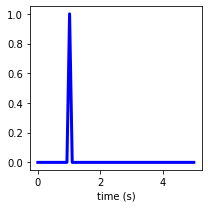

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3))

t = np.linspace(0, 5, 60)
ax.plot(t, delta(t, delta_t=1), linewidth=3, color='blue')
ax.set_xlabel('time (s)')
fig.tight_layout()

We are now ready to apply it to our car:

In [ ]:
# We assume we have identified the model parameters
m = 10
alpha = 1
beta = 10
gamma = 100
params = (m, alpha, beta, gamma)

# We select the car initial conditions (position and velocity)
x_0 = (0,0)

# We create our car
car = LinearCar(x_0, params)

theta = 0 # disturbance

# And finally we define the simulation parameters
t0, tf, dt = 0, 10, 0.1 # time

position = []
velocity = []
input_values = []
time = []
for t in np.arange(t0, tf, dt):
    # HERE, we apply the impulse
    u = delta(t, delta_t=0, eps=0.01)
    
    car.step(dt, u, theta)
    x, y, v = car.sensor_i()
    position.append((x,y)), velocity.append(v)
    time.append(t)
    input_values.append(u)
    
print('simulation complete')    

simulation complete


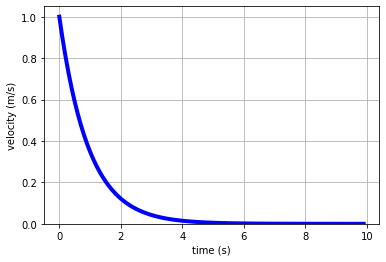

In [ ]:
plt.plot(np.arange(t0, tf, dt), velocity, linewidth=4, color='blue', label='t_0')
plt.xlabel('time (s)'), plt.ylabel('velocity (m/s)');
plt.ylim(0,)
plt.grid();

Because of time invariance, if we have another impulse we can expect the same response at this second time, and if we hit twice as hard, then the response is twice as large

In [ ]:
def multiple_impulses(t):
    u1 = 1*delta(t, delta_t=0, eps=0.01)
    u2 = 2*delta(t, delta_t=1, eps=0.01)
    u3 = 2*delta(t, delta_t=4, eps=0.01)
    
    return u1 + u2 + u3

In [ ]:
car = LinearCar(x0=(0,0), params=params)

position = []
velocity = []
input_values = []
time = []
for t in np.arange(t0, tf, dt):
    # HERE, we apply the impulse
    u = multiple_impulses(t)
    
    car.step(dt, u, theta)
    x, y, v = car.sensor_i()
    position.append((x,y)), velocity.append(v)
    time.append(t)
    input_values.append(u)
    
print('simulation complete')   

simulation complete


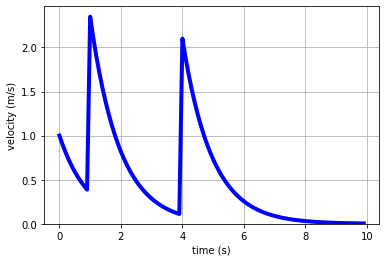

In [ ]:
plt.plot(np.arange(t0, tf, dt), velocity, linewidth=4, color='blue', label='t_0')
plt.xlabel('time (s)'), plt.ylabel('velocity (m/s)');
plt.ylim(0,)
plt.grid();

- Because of the superposition principle, the full response is the summation of the signals.

- If we have a more complex signal (e.g. ramp) we can break it down to a sequence of impulses (the output is the response to each of the impulses)

In [ ]:
def ramp_as_impulses(t, time_vector):    
    u = t*delta(time_vector, delta_t=t, eps=.01)
    return u

In [ ]:
u1 = ramp_as_impulses(1, time_vector = np.arange(t0, tf, dt))

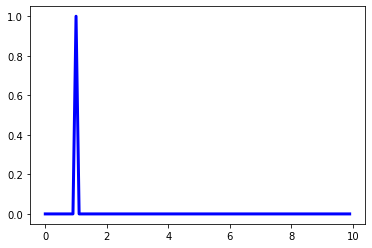

In [ ]:
plt.plot(np.arange(t0, tf, dt), u1, linewidth=3, color='blue')


In [ ]:
len(u1)

And we can verify that this is a ramp:

In [ ]:
input_u = []

for t in np.arange(t0, tf, .4):
    input_u.append(ramp_as_impulses(t, np.arange(t0, tf, .4)))

In [ ]:
len(input_u)

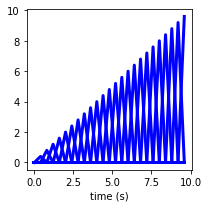

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3))

ax.plot(np.arange(t0, tf, .4), input_u, linewidth=3, color='blue')
ax.set_xlabel('time (s)')
fig.tight_layout()

In [ ]:
car = LinearCar(x0=(0,0), params=params)

position = []
velocity = []
input_values = []
time = []
for index, t in enumerate(np.arange(t0, tf, dt)):
    # HERE, we apply the ramp as a sequence of impulses
    u = ramp_as_impulses(t, np.arange(t0, tf, dt))    
    #print('time:', t, '-> index:', index, '->u[i]:', u[index])
    car.step(dt, u[index], theta)
    x, y, v = car.sensor_i()
    position.append((x,y)), velocity.append(v)
    time.append(t)
    input_values.append(u)
    
print('simulation complete')   

simulation complete


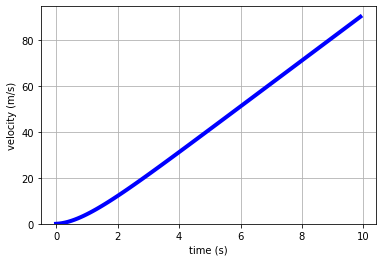

In [ ]:
plt.plot(np.arange(t0, tf, dt), velocity, linewidth=4, color='blue', label='t_0')
plt.xlabel('time (s)'), plt.ylabel('velocity (m/s)');
plt.ylim(0,)
plt.grid();

- In reality, the impulses and responses will be infinitesimal
- In this case, the summation in the time domain is a convolution $u(t) \circledast H(t)$, where $H(t)$ is the impulse response of the system. 
- This can be a difficult integration..

- If we use the Laplace transform and move to the s-domain however, convolutions become multiplications, and things are simpler.

- As a control engineers we would like to design our systems to be as close as possible to be LTI, or so that the non LTI parts can be ignored.
- So that the standard LTI tools can be used.

------------------------------